In [1]:
import sqlite3
import pandas as pd

In [2]:
# Read sqlite query results into a pandas DataFrame
with sqlite3.connect("./switrs.sqlite3") as con:

    query = (
        "SELECT Latitude, Longitude "
        "FROM Collision AS C "
        "WHERE Latitude IS NOT NULL AND Longitude IS NOT NULL "
    )

    # Construct a Dataframe from the results
    df = pd.read_sql_query(query, con)

In [3]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

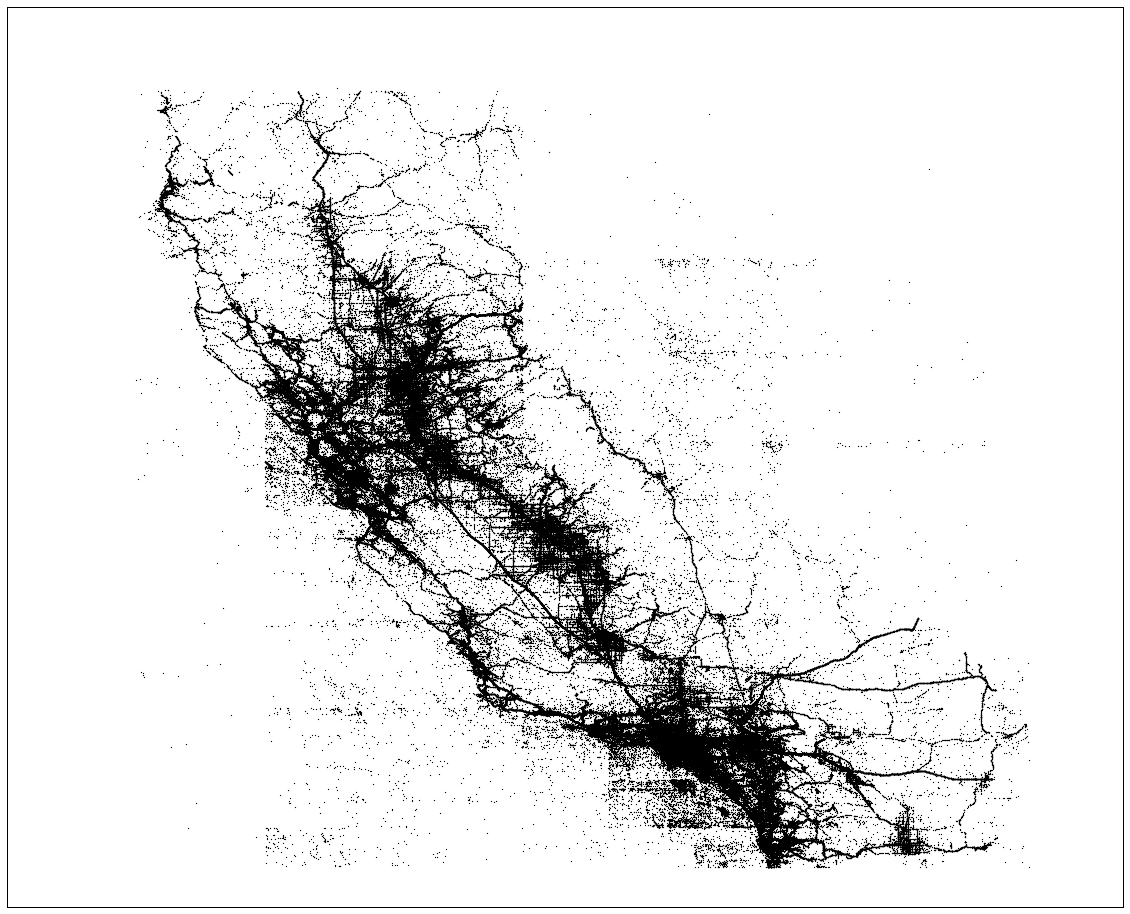

In [4]:
%matplotlib inline

fig = plt.figure(figsize=(20,20))

map = Basemap(
    projection='gall',
    llcrnrlon = -126,   # lower-left corner longitude
    llcrnrlat = 32,     # lower-left corner latitude
    urcrnrlon = -113,   # upper-right corner longitude
    urcrnrlat = 43,     # upper-right corner latitude
)


x,y = map(df['Longitude'].values, df['Latitude'].values)

# Plot them using round markers of size 6
map.plot(x, y, 'k.', markersize=1.5)